In [1]:
import numpy as np
from pyemittance.emittance_calc import EmitCalc
from pyemittance.optics import quad_drift_mat2, propagate_sigma

# Create data

In [2]:
# Some beam covariance matrix
EMIT = 1e-9
BETA_X = 10
ALPHA_X = -1
GAMMA_X = (1+ALPHA_X**2)/BETA_X
SIGMA_X = np.sqrt(EMIT*BETA_X)
SIGMA_PX = np.sqrt(EMIT*GAMMA_X)
COV_X__PX = -ALPHA_X*EMIT


SIGMA_11 = SIGMA_X**2
SIGMA_12 = COV_X__PX
SIGMA_22 = SIGMA_PX**2

SIGMA0 = np.array([[SIGMA_11, SIGMA_12], [SIGMA_12, SIGMA_22]])

In [4]:
emit_calc = EmitCalc()

def beam_size_meas(kL, sigma0, Ltot=2.2, Lquad=0):
    mat2 = quad_drift_mat2(kL, Lquad=Lquad, Ltot=Ltot)
    sigma1 = propagate_sigma(sigma0, mat2)
    return np.sqrt(sigma1[0,0])

@np.vectorize
def model(kL):
    return beam_size_meas(kL, SIGMA0, Ltot=2.26, Lquad=0.108)

kLlist = np.linspace(0.2, 0.7, 10)

# Make the data
meas =  np.array([model(k) for k in kLlist])

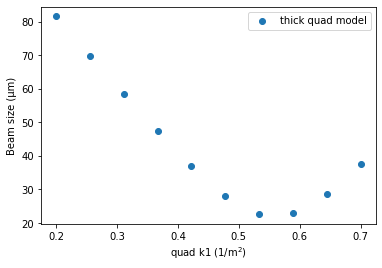

In [5]:
import matplotlib.pyplot as plt

plt.scatter(kLlist, meas*1e6, label='thick quad model')
plt.xlabel(r'quad k1 (1/m$^2$)')
plt.ylabel('Beam size (µm)')
plt.legend()

# Fit data w/ PyEmittance

In [6]:
from pyemittance.observer import Observer
from pyemittance.emittance_calc import EmitCalc

o1 = Observer(kLlist, {'x': meas ,'y': meas} )

In [7]:
ef1 = EmitCalc(o1.quad_meas,o1.beam_meas)
emitx, erry = ef1.do_emit_fit(dim='x')
emity, erry = ef1.do_emit_fit(dim='y')

AttributeError: 'EmitCalc' object has no attribute 'estimate_sigma_mat_thick_quad_drift'